In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

In [2]:
# Loading train and test data

train = pd.read_csv("../Dataset/train_1.csv").drop("Unnamed: 0",1) 
test = pd.read_csv("../Dataset/test_1.csv").drop("Unnamed: 0",1) 

train.describe()

,var15,ind_var5,ind_var30,num_var4,num_var5,num_var30,num_var42,var36,num_meses_var5_ult3,Zeros,PCA0,PCA1,PCA2,PCA3,TARGET
count,6016.000000,6016.000000,6016.000000,6016.000000,6016.000000,6016.000000,6016.000000,6016.000000,6016.000000,6016.000000,6.016000e+03,6016.000000,6016.000000,6016.000000,6016.000000
mean,0.322317,0.500831,0.567487,0.151042,0.251745,0.200798,0.189051,0.526307,0.498005,0.810026,3.989362e-03,0.060284,0.084066,0.327487,0.500000
std,0.133505,0.500041,0.495466,0.166752,0.252661,0.186202,0.175684,0.489467,0.462579,0.163285,6.304052e-02,0.026152,0.020450,0.034894,0.500042
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,0.206186,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.020202,0.000000,0.731092,9.605320e-11,0.048518,0.081464,0.323769,0.000000
50%,0.298969,1.000000,1.000000,0.166667,0.500000,0.333333,0.333333,1.000000,0.666667,0.823529,1.269841e-10,0.057213,0.082041,0.323803,0.500000
75%,0.402062,1.000000,1.000000,0.166667,0.500000,0.333333,0.333333,1.000000,1.000000,0.949580,1.429844e-10,0.062587,0.082629,0.323833,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000e+00,1.000000,1.000000,1.000000,1.000000


In [3]:
# Making pairplot

#sns.pairplot(train, hue="TARGET", diag_kind = 'hist')

TARGET
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: var15, dtype: object

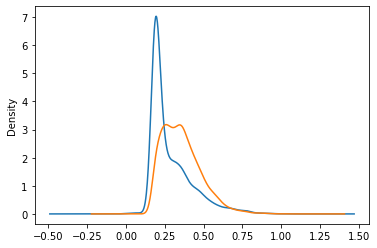

In [4]:
# Analysing var15

train.groupby("TARGET").var15.plot(kind='kde')

TARGET
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: var15_level, dtype: object

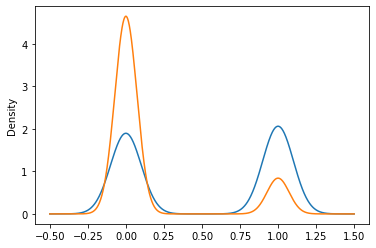

In [17]:
# Creating a new variable

def get_level(x):
    if x > 0 and x < 0.23:
        y = 1
    else: y = 0
    return y

train["var15_level"] = train["var15"].apply(get_level)
test["var15_level"] = test["var15"].apply(get_level)
train.groupby("TARGET").var15_level.plot(kind='kde')

TARGET
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Zeros, dtype: object

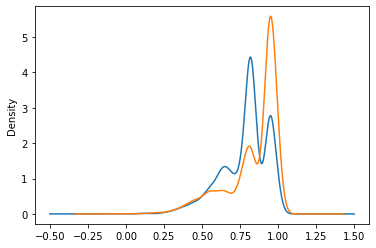

In [6]:
# Analysing Zeros

train.groupby("TARGET").Zeros.plot(kind='kde')

TARGET
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Zeros_level, dtype: object

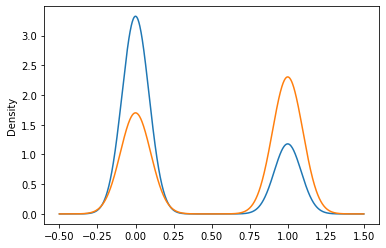

In [13]:
# Creating a new variable

def get_level(x):
    if x > 0.87:
        y = 1
    else: y = 0
    return y

train["Zeros_level"] = train["Zeros"].apply(get_level)
test["Zeros_level"] = test["Zeros"].apply(get_level)
train.groupby("TARGET").Zeros_level.plot(kind='kde')

In [14]:
# Checking correlation of remaining variables to the target variable

abs(train.corr(method = 'pearson')["TARGET"]).sort_values()

PCA0                   0.031644
PCA2                   0.077868
PCA3                   0.080415
PCA1                   0.083948
Zeros                  0.168035
num_var4               0.186091
var36                  0.255092
var15                  0.263786
num_var5               0.301669
ind_var5               0.304189
num_var42              0.306578
Zeros_level            0.318078
num_var30              0.324376
ind_var30              0.325452
num_meses_var5_ult3    0.333496
var15_level            0.388905
TARGET                 1.000000
Name: TARGET, dtype: float64

In [15]:
# Saving data

train.to_csv("../Dataset/train_2.csv")
test.to_csv("../Dataset/test_2.csv")